In [91]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from pandas.api.types import CategoricalDtype
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings("ignore")

In [92]:
df = pd.read_csv('Amazon Sale Report.csv')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [94]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [95]:
df.shape

(128975, 24)

In [96]:
df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [97]:
df.drop(['index', 'promotion-ids', 'fulfilled-by', 'Unnamed: 22'], axis = 1, inplace = True)

In [98]:
df.isna().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Courier Status        6872
Qty                      0
currency              7795
Amount                7795
ship-city               33
ship-state              33
ship-postal-code        33
ship-country            33
B2B                      0
dtype: int64

In [99]:
df.Status.value_counts()

Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

In [100]:
replacement_mapping = {
    "Shipped - Delivered to Buyer": "Shipped",
    "Shipped - Returned to Seller": "Returned",
    "Shipped - Picked Up": "Shipped",
    "Shipped - Returning to Seller": "Returning",
    "Shipped - Out for Delivery": "Out for Delivery",
    "Shipped - Rejected by Buyer": "Rejected",
    "Shipped - Damaged": "Damaged",
    "Shipping": "Shipped",
    "Shipped - Lost in Transit" : "Lost",
    "Pending - Waiting for Pick Up": "Pending Pick Up"
}

In [101]:
for old_value, new_value in replacement_mapping.items():
    df['Status'] = df['Status'].str.replace(old_value, new_value)

In [102]:
df.Status.value_counts()

Shipped             107554
Cancelled            18332
Returned              1953
Pending                658
Pending Pick Up        281
Returning              145
Out for Delivery        35
Rejected                11
Lost                     5
Damaged                  1
Name: Status, dtype: int64

In [103]:
df['Courier Status'].value_counts()

Shipped      109487
Unshipped      6681
Cancelled      5935
Name: Courier Status, dtype: int64

In [104]:
df[df['Courier Status'].isna()].count()

Order ID              6872
Date                  6872
Status                6872
Fulfilment            6872
Sales Channel         6872
ship-service-level    6872
Style                 6872
SKU                   6872
Category              6872
Size                  6872
ASIN                  6872
Courier Status           0
Qty                   6872
currency              5136
Amount                5136
ship-city             6869
ship-state            6869
ship-postal-code      6869
ship-country          6869
B2B                   6872
dtype: int64

In [105]:
df[(df['Status'] == 'Cancelled') & (df['Courier Status']== 'Cancelled')].count()

Order ID              5840
Date                  5840
Status                5840
Fulfilment            5840
Sales Channel         5840
ship-service-level    5840
Style                 5840
SKU                   5840
Category              5840
Size                  5840
ASIN                  5840
Courier Status        5840
Qty                   5840
currency                 0
Amount                   0
ship-city             5838
ship-state            5838
ship-postal-code      5838
ship-country          5838
B2B                   5840
dtype: int64

In [106]:
df[(df['Status'] == 'Cancelled') & (df['Courier Status']== 'Unshipped')].count()

Order ID              5631
Date                  5631
Status                5631
Fulfilment            5631
Sales Channel         5631
ship-service-level    5631
Style                 5631
SKU                   5631
Category              5631
Size                  5631
ASIN                  5631
Courier Status        5631
Qty                   5631
currency              5630
Amount                5630
ship-city             5629
ship-state            5629
ship-postal-code      5629
ship-country          5629
B2B                   5631
dtype: int64

In [107]:
df['Courier Status'] = np.where((df['Status'] == 'Cancelled') & df['Courier Status'].isna(), 'Cancelled', df['Courier Status'])

In [108]:
df['Courier Status'] = np.where((df['Status'] == 'Cancelled') & (df['Courier Status'] == 'Unshipped'), 'Cancelled', df['Courier Status'])

In [109]:
df['Courier Status'].value_counts()

Shipped      109487
Cancelled     18427
Unshipped      1050
Name: Courier Status, dtype: int64

In [110]:
df[df['Courier Status'] == 'Unshipped']

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
937,S02-5278980-4327051,04-30-22,Shipped,Amazon,Non-Amazon,Standard,BL017,BL017-63BLACK,Blouse,Free,B077Z7WDXN,Unshipped,15,NaN,NaN,Surat,Gujarat,394210.0,IN,False
1057,S02-9107114-0460608,04-30-22,Shipped,Amazon,Non-Amazon,Standard,SET315,SET315-KR-PP-XL,Set,XL,B09RKDN6S4,Unshipped,2,NaN,NaN,Surat,Gujarat,394210.0,IN,False
3631,S02-1006261-5356758,04-28-22,Shipped,Amazon,Non-Amazon,Standard,JNE2305,JNE2305-KR-533-L,kurta,L,B07GRSCXCP,Unshipped,9,NaN,NaN,Surat,Gujarat,394210.0,IN,False
3632,S02-3681731-6111841,04-28-22,Shipped,Amazon,Non-Amazon,Standard,JNE2058,JNE2058-KR-339-L,kurta,L,B075ZTMFJX,Unshipped,1,NaN,NaN,Surat,Gujarat,394210.0,IN,False
3634,S02-1926028-4838217,04-28-22,Shipped,Amazon,Non-Amazon,Standard,JNE3311,JNE3311-KR-A-XS,kurta,XS,B07XJ15Q1S,Unshipped,1,NaN,NaN,Surat,Gujarat,394210.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123903,406-7258755-6702715,06-04-22,Pending,Amazon,Amazon.in,Expedited,JNE3373,JNE3373-KR-M,kurta,M,B082W8F8P3,Unshipped,1,INR,376.0,KOZHIKODE,KERALA,673011.0,IN,False
124616,S02-2059602-9568060,06-04-22,Shipped,Amazon,Non-Amazon,Standard,JNE3577,JNE3577-KR-S,kurta,S,B08MYV4CHS,Unshipped,1,NaN,NaN,Surat,Gujarat,394210.0,IN,False
124617,S02-3811761-8377519,06-04-22,Shipped,Amazon,Non-Amazon,Standard,J0103,J0103-SKD-XS,Set,XS,B08VWKSVV7,Unshipped,2,NaN,NaN,Surat,Gujarat,394210.0,IN,False
124619,S02-5216693-3162561,06-04-22,Shipped,Amazon,Non-Amazon,Standard,SET154,SET154-KR-NP-XXL,Set,XXL,B082PXQ5BL,Unshipped,1,NaN,NaN,Surat,Gujarat,394210.0,IN,False


In [111]:
df.isna().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Courier Status          11
Qty                      0
currency              7795
Amount                7795
ship-city               33
ship-state              33
ship-postal-code        33
ship-country            33
B2B                      0
dtype: int64

In [112]:
df.dropna(axis = 0, inplace = True)

In [113]:
df.isna().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

In [114]:
df.duplicated().sum()

3

In [115]:
df.drop_duplicates(inplace = True)

In [116]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,04-30-22,Shipped,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Cancelled,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


In [117]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

In [118]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,2022-04-30,Shipped,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Cancelled,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


In [119]:
df['month'] = df['Date'].dt.month_name() 
m_value = ['January', 'February', 'March', 'April', 'May',
           'June', 'July', 'August', 'September', 'October',
           'November', 'December']
df['month'] = df['month'].astype(CategoricalDtype(categories=m_value, ordered=False))

In [120]:
df['week'] = df['Date'].dt.day_name()

In [121]:
w_value = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
           'Friday', 'Saturday', 'Sunday']

In [122]:
df['week'] = df['week'] .astype(CategoricalDtype(categories=w_value, ordered=False))

In [123]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,month,week
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,April,Saturday
1,171-9198151-1101146,2022-04-30,Shipped,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,April,Saturday
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,April,Saturday
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Cancelled,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,April,Saturday
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,April,Saturday


In [124]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'month',
       'week'],
      dtype='object')

In [125]:
df = df.rename(columns={
    'Order ID': 'Order_id',
    'Sales Channel ': 'Channel',
    'Courier Status': 'Courier_Status',
    'ship-city': 'ship_city',
    'ship-state': 'ship_state',
    'ship-postal-code': 'postal_code',
    'ship-country': 'country'
})

In [126]:
df.columns

Index(['Order_id', 'Date', 'Status', 'Fulfilment', 'Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier_Status', 'Qty', 'currency', 'Amount', 'ship_city',
       'ship_state', 'postal_code', 'country', 'B2B', 'month', 'week'],
      dtype='object')

In [127]:
column_names_reordered = ['Order_id', 'Date', 'month', 'week', 'Status', 'Fulfilment', 'Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier_Status', 'Qty', 'currency', 'Amount', 'ship_city',
       'ship_state', 'postal_code', 'country', 'B2B']

In [128]:
df = df[column_names_reordered]

In [129]:
df.head(2)

,Order_id,Date,month,week,Status,Fulfilment,Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier_Status,Qty,currency,Amount,ship_city,ship_state,postal_code,country,B2B
0,405-8078784-5731545,2022-04-30,April,Saturday,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,2022-04-30,April,Saturday,Shipped,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False


In [130]:
df['ship_city'] = df['ship_city'].str.title()
df['ship_state'] = df['ship_state'].str.title()

In [131]:
df.head(2)

,Order_id,Date,month,week,Status,Fulfilment,Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier_Status,Qty,currency,Amount,ship_city,ship_state,postal_code,country,B2B
0,405-8078784-5731545,2022-04-30,April,Saturday,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,0,INR,647.62,Mumbai,Maharashtra,400081.0,IN,False
1,171-9198151-1101146,2022-04-30,April,Saturday,Shipped,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,Bengaluru,Karnataka,560085.0,IN,False


In [132]:
df.to_csv('Amazon_Sale_Report_Cleaned.csv', index=False)

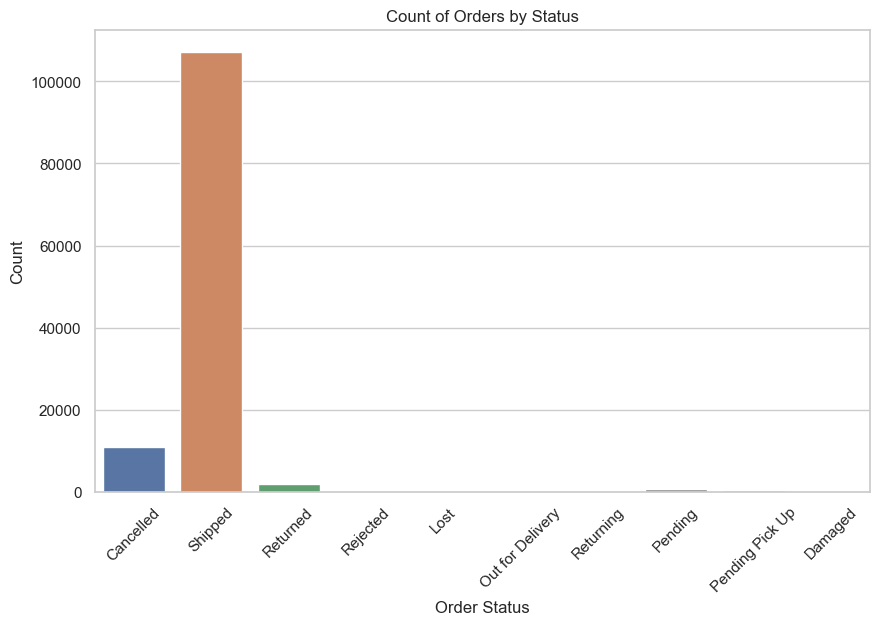

In [133]:
# Plot 1: Count of Orders by Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=df)
plt.title('Count of Orders by Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


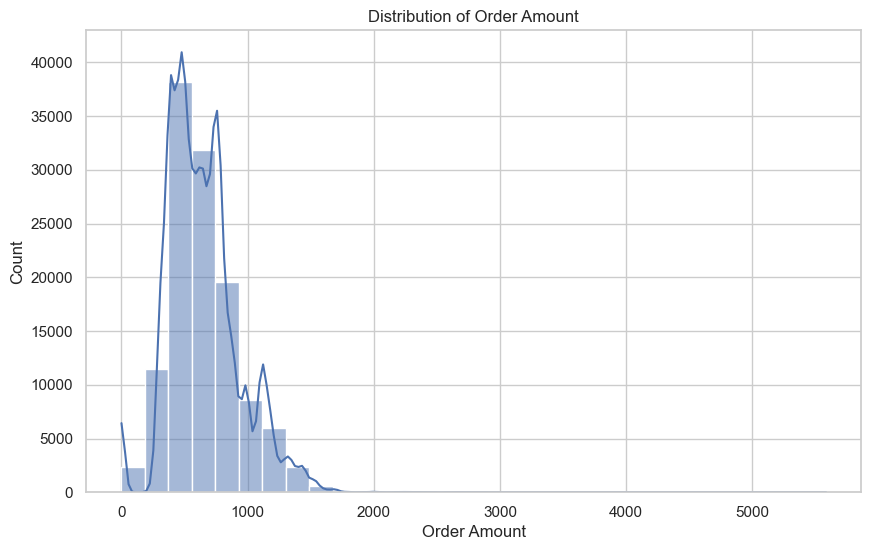

In [134]:

# Plot 2: Distribution of Order Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Distribution of Order Amount')
plt.xlabel('Order Amount')
plt.ylabel('Count')
plt.show()

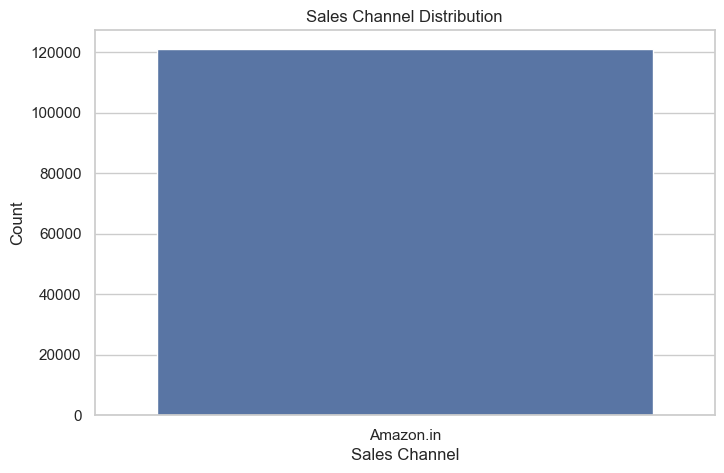

In [135]:
# Plot 3: Sales Channel Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Channel', data=df)
plt.title('Sales Channel Distribution')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.show()

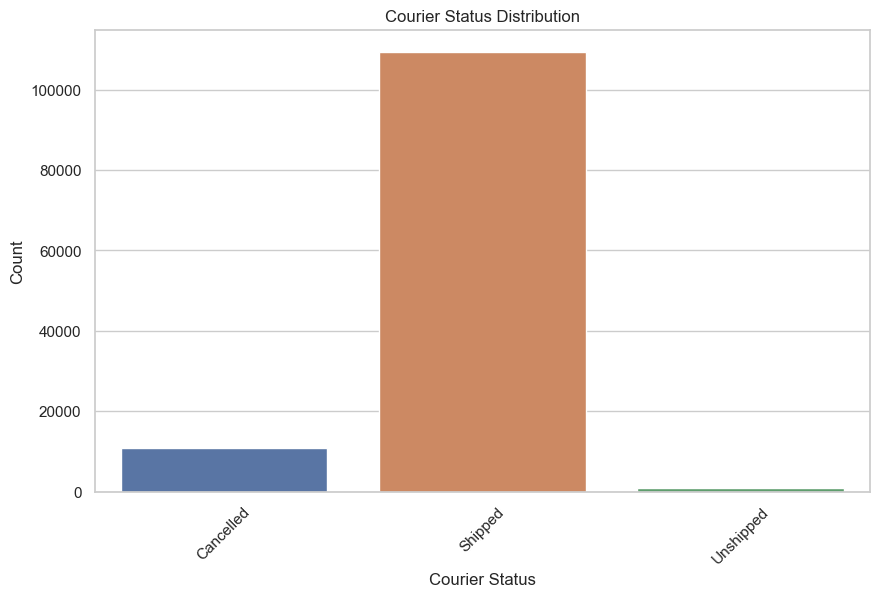

In [136]:
# Plot 4: Courier Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Courier_Status', data=df)
plt.title('Courier Status Distribution')
plt.xlabel('Courier Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

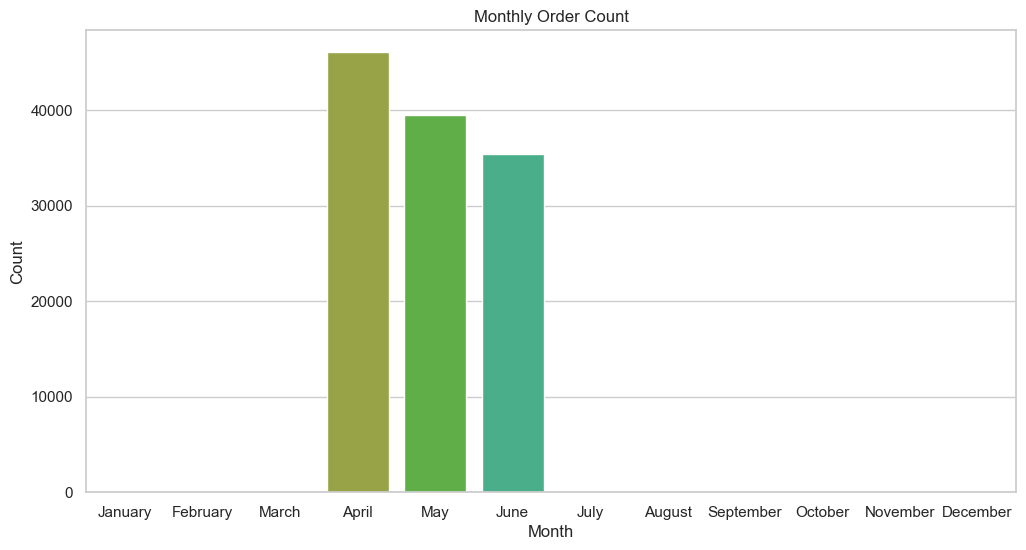

In [137]:
# Plot 5: Monthly Order Count
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df, order=m_value)
plt.title('Monthly Order Count')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

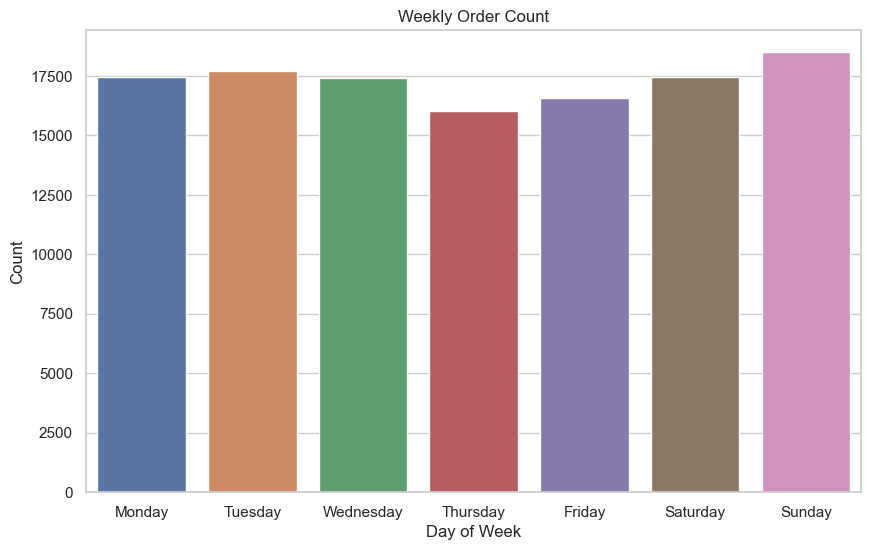

In [138]:
# Plot 6: Weekly Order Count
plt.figure(figsize=(10, 6))
sns.countplot(x='week', data=df, order=w_value)
plt.title('Weekly Order Count')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()